# Week 1 Lab - Introduction to NLP Basics

Welcome to the first lab session of the Introduction to NLP and LLMs 2024 course. In this lab, we'll explore fundamental concepts of Natural Language Processing (NLP) and get hands-on experience with some basic NLP tasks.

## Objectives

- Understand basic NLP concepts
- Implement tokenization using NLTK
- Perform part-of-speech tagging
- Visualize word embeddings using Word2Vec
- Experiment with basic text generation (if applicable)

Let's begin by setting up our environment and importing the necessary libraries.


In [ ]:
# Install required libraries
%pip install nltk gensim matplotlib scikit-learn openai


In [9]:
# Import necessary modules
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import gensim.downloader as api
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Download necessary NLTK data
nltk.download("punkt_tab")
nltk.download("averaged_perceptron_tagger_eng")

print("Setup complete!")

Setup complete!


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/yj.lee/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/yj.lee/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


## 1. Introduction to NLP Basics

Natural Language Processing (NLP) is a field at the intersection of computer science, artificial intelligence, and linguistics. It focuses on the interaction between computers and human language. Some key concepts in NLP include:

- Tokenization: Breaking text into individual words or subwords
- Part-of-speech tagging: Assigning grammatical categories to words
- Named Entity Recognition: Identifying and classifying named entities in text
- Word Embeddings: Dense vector representations of words

Let's start with a simple example to demonstrate these concepts.


In [2]:
# Sample text for demonstrations
sample_text = "The quick brown fox jumps over the lazy dog. NLP is fascinating!"
print("Sample text:", sample_text)

Sample text: The quick brown fox jumps over the lazy dog. NLP is fascinating!


## 2. Tokenization Example using NLTK

Tokenization is the process of breaking down text into individual words or subwords. It's a fundamental step in many NLP tasks. Let's use NLTK to tokenize our sample text.


In [3]:
def tokenize_text(text):
    """Tokenize the input text using NLTK's word_tokenize function."""
    return word_tokenize(text)


# Tokenize the sample text
tokens = tokenize_text(sample_text)
print("Tokenized text:", tokens)
print(f"Number of tokens: {len(tokens)}")

Tokenized text: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', 'NLP', 'is', 'fascinating', '!']
Number of tokens: 14


## 3. Part-of-Speech Tagging Demonstration

Part-of-Speech (POS) tagging is the process of assigning a grammatical category (e.g., noun, verb, adjective) to each word in a text. This information is crucial for understanding the structure and meaning of sentences.


In [6]:
def pos_tag_text(tokens):
    """Perform POS tagging on the input tokens."""
    return pos_tag(tokens)


# Perform POS tagging on the tokenized text
pos_tags = pos_tag_text(tokens)
print("POS tags:")
for word, tag in pos_tags:
    print(f"{word}: {tag}")

POS tags:
The: DT
quick: JJ
brown: NN
fox: NN
jumps: VBZ
over: IN
the: DT
lazy: JJ
dog: NN
.: .
NLP: NNP
is: VBZ
fascinating: VBG
!: .


## 4. Simple Word Embedding Visualization using Gensim's Word2Vec

Word embeddings are dense vector representations of words that capture semantic relationships. We'll use Gensim's Word2Vec model to create and visualize word embeddings for our sample text.


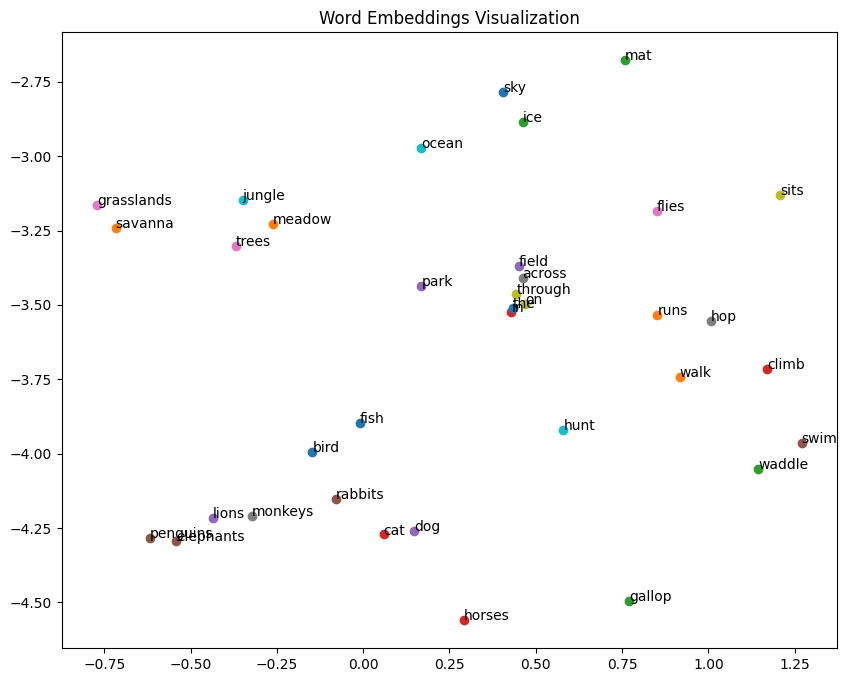

In [15]:
def visualize_embeddings(model, words):
    """Visualize word embeddings using t-SNE."""
    word_vectors = [model[word] for word in words if word in model]
    if not word_vectors:
        print("No words found in the model vocabulary.")
        return
    word_vectors = np.array(word_vectors)  # Convert to numpy array

    # Adjust perplexity based on the number of samples
    n_samples = word_vectors.shape[0]
    perplexity = min(
        30, n_samples - 1
    )  # Default is 30, but ensure it's less than n_samples

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    embeddings_2d = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        if word in model:
            x, y = embeddings_2d[i]
            plt.scatter(x, y)
            plt.annotate(word, (x, y))
    plt.title("Word Embeddings Visualization")
    plt.show()


# Load pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")


# Define example sentences
sentences = [
    "The cat sits on the mat",
    "The dog runs in the park",
    "A bird flies through the sky",
    "Fish swim in the ocean",
    "Elephants walk in the savanna",
    "Lions hunt in the grasslands",
    "Monkeys climb trees in the jungle",
    "Penguins waddle on the ice",
    "Horses gallop across the field",
    "Rabbits hop in the meadow",
]

# Get all unique words from the sentences
all_words = list(
    set(word.lower() for sentence in sentences for word in sentence.split())
)

# Filter words to only those present in the model's vocabulary
words_to_plot = [word for word in all_words if word in model.key_to_index]

# Visualize embeddings
visualize_embeddings(model, words_to_plot)

## 5. Basic Text Generation using OpenAI's GPT-4o API (Optional)

Note: This section requires an OpenAI API key and may incur costs. If you don't have access to the API, you can skip this section.

We'll use OpenAI's GPT-4o mini model to generate text based on a prompt. This demonstrates the power of large language models in text generation tasks.


In [18]:
import openai
import os

# Set the API key and model name
MODEL = "gpt-4o-mini"

# Initialize the OpenAI client
client = openai.OpenAI(
    api_key=os.environ.get(
        "OPENAI_API_KEY", "<your OpenAI API key if not set as an env var>"
    )
)

# Create a chat completion
completion = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant. Help me with my math homework!",
        },  # <-- This is the system message that provides context to the model
        {
            "role": "user",
            "content": "Hello! Could you solve 2+2?",
        },  # <-- This is the user message for which the model will generate a response
    ],
)

# Print the assistant's response
print(f"Assistant: {completion.choices[0].message.content}")

Assistant: Of course! \(2 + 2 = 4\).


## Conclusion

In this lab session, we've explored some fundamental concepts and techniques in Natural Language Processing:

1. We learned about tokenization and implemented it using NLTK.
2. We performed part-of-speech tagging to understand the grammatical structure of sentences.
3. We visualized word embeddings using Gensim's Word2Vec model.
4. (Optionally) We experimented with text generation using a large language model.

These basic techniques form the foundation for more advanced NLP tasks and applications. In the coming weeks, we'll build upon these concepts to explore more sophisticated NLP methods and models.

## Optional Exercises

1. Try tokenizing and performing POS tagging on a longer piece of text, such as a news article or a short story.
2. Experiment with different parameters in the Word2Vec model (e.g., vector_size, window) and observe how they affect the resulting embeddings.
3. If you have access to the OpenAI API, try generating text with different prompts and compare the results.
4. Implement a simple text classification task using the techniques learned in this lab (e.g., classify sentences as questions or statements based on their POS tags).
